In [56]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm
import pandas as pd
from statistics import mode
from helper_functions import energy_name

In [57]:
%matplotlib inline

In [58]:
save_plot = True # False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "compare_MUSIC"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [59]:
df = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water.hdf5')
# !!!!!! simulation in ice  - not water !!!!!!!!!!!!
df

,E_i,E_f,distances,deflection,x_dir_i,y_dir_i,z_dir_i,x_i,y_i,z_i,x_f,y_f,z_f
0,2000.0,0.200000,1604.874964,8.847735,0.0,0.0,1.0,0.0,0.0,0.0,-524.662556,201.134609,160479.941499
1,2000.0,687.083800,3000.000000,0.137316,0.0,0.0,1.0,0.0,0.0,0.0,313.408525,-105.517592,299999.641344
2,2000.0,470.082908,3000.000000,0.093675,0.0,0.0,1.0,0.0,0.0,0.0,114.018856,-31.357471,299999.912964
3,2000.0,488.508415,3000.000000,0.077297,0.0,0.0,1.0,0.0,0.0,0.0,-112.197193,-54.858427,299999.912052
4,2000.0,33.516930,3000.000000,0.790317,0.0,0.0,1.0,0.0,0.0,0.0,518.874108,140.390981,299997.966962
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2000.0,0.199750,2836.812539,7.010748,0.0,0.0,1.0,0.0,0.0,0.0,347.559914,235.456335,283674.318813
999996,2000.0,356.101734,3000.000000,0.065811,0.0,0.0,1.0,0.0,0.0,0.0,-323.701793,210.717255,299999.535188
999997,2000.0,615.548507,3000.000000,0.032227,0.0,0.0,1.0,0.0,0.0,0.0,-128.971485,-47.462755,299999.936531
999998,2000.0,103.086678,3000.000000,0.133853,0.0,0.0,1.0,0.0,0.0,0.0,-17.664694,115.545034,299999.754015


In [60]:
E_i = df.E_i[0] * 1e3 # in MeV
E_f = mode(df.E_f) * 1e3 # in MeV 
n_events = len(df)

In [61]:
df_MUSIC = pd.read_csv('data/compare_MUSIC/MUSIC_displacement.csv', sep=';', names=['d_shower', 'counts'], decimal=',')
df_MUSIC

,d_shower,counts
0,0.115607,4219.808475
1,0.231214,12274.193745
2,0.393064,13525.319750
3,0.393064,20597.633683
4,0.624277,28466.400333
...,...,...
102,18.913295,5.041690
103,19.052023,1.972795
104,19.167630,2.908709
105,19.722543,3.103154


In [62]:
df_GEANT4 = pd.read_csv('data/compare_MUSIC/Geant4_displacement.csv', sep=';', names=['d_shower', 'counts'], decimal=',')
df_GEANT4

,d_shower,counts
0,0.115607,2770.913387
1,0.184971,7677.960997
2,0.393064,8460.586469
3,0.508671,12884.579740
4,0.578035,16159.611420
...,...,...
105,19.468208,20.933560
106,19.583815,12.677818
107,19.676301,10.440838
108,19.768786,14.429477


In [63]:
df_GEANT4_angle = pd.read_csv('data/compare_MUSIC/GEANT4_angle.csv', sep=';', names=['angle', 'counts'], decimal=',')
df_GEANT4_angle

,angle,counts
0,0.017241,64118.000
1,0.045977,98935.000
2,0.097701,114320.000
3,0.109200,150230.000
4,0.155170,150230.000
...,...,...
103,4.821800,25.254
104,4.856300,20.826
105,4.902300,26.078
106,4.948300,26.930


In [64]:
df_MUSIC_angle = pd.read_csv('data/compare_MUSIC/MUSIC_angle.csv', sep=';', names=['angle', 'counts'], decimal=',')
df_MUSIC_angle

,angle,counts
0,0.022989,82910.000
1,0.040230,176410.000
2,0.097701,176410.000
3,0.149430,165430.000
4,0.155170,116180.000
...,...,...
98,4.787400,21.163
99,4.839100,21.854
100,4.879300,17.735
101,4.925300,12.061


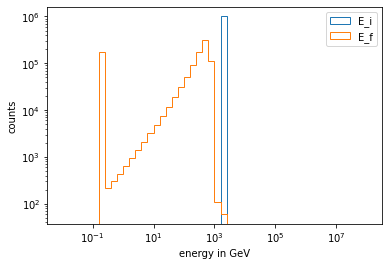

In [65]:
# energy
bins = np.logspace(-2, 8, 51)

plt.hist(df.E_i, bins=bins, histtype='step', label='E_i')
plt.hist(df.E_f, bins=bins, histtype='step', label='E_f')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('energy in GeV')
plt.ylabel('counts')
plt.legend()

Text(0.5, 0, 'propagation distance in meter')

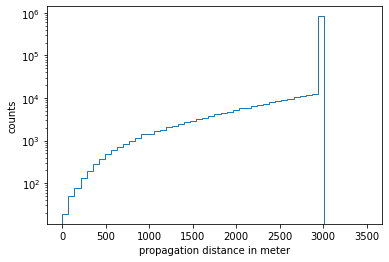

In [66]:
# propagation distance
bins = np.linspace(0, 3500, 51)

plt.hist(df.distances, bins=bins, histtype='step')
plt.yscale('log')
# plt.xscale('log')
plt.ylabel('counts')
plt.xlabel('propagation distance in meter')


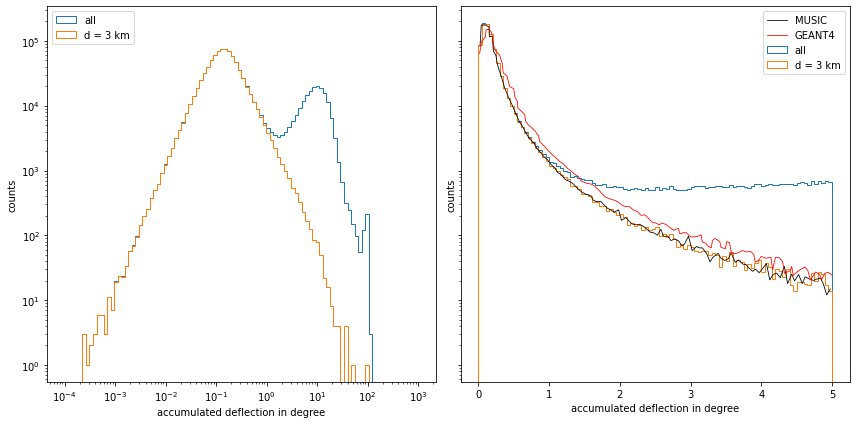

In [67]:
# Deflection
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

bins = np.logspace(-4, 3, 101)
ax[0].hist(df.deflection, bins=bins, histtype='step', label='all')
ax[0].hist(df.deflection[df.distances==3e3], bins=bins, histtype='step', label='d = 3 km')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('accumulated deflection in degree')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper left')

bins = np.linspace(0, 5, 101)
ax[1].hist(df.deflection, bins=bins, histtype='step', label='all')
ax[1].hist(df.deflection[df.distances==3e3], bins=bins, histtype='step', label='d = 3 km')
ax[1].set_yscale('log')
ax[1].set_xlabel('accumulated deflection in degree')
ax[1].set_ylabel('counts')


ax[1].plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
ax[1].plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label='GEANT4')

ax[1].legend(loc='upper right')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_accumulated_defl.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

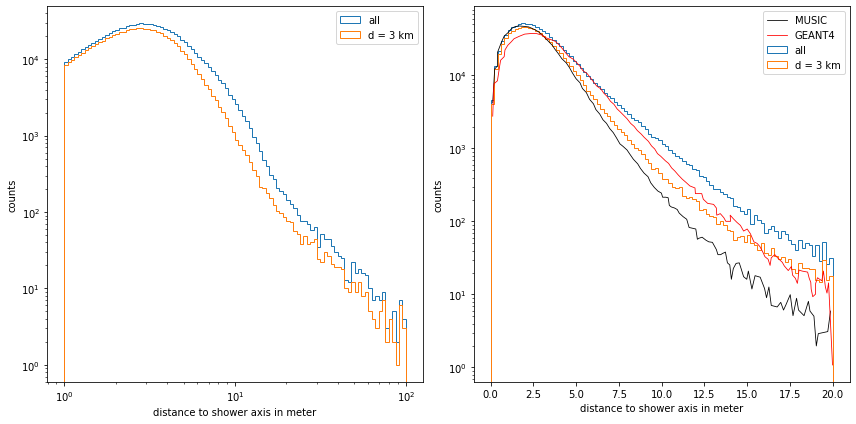

In [68]:
# Distance to shower axis 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

d_shower = np.sqrt(df.x_f**2 + df.y_f**2) / 1e2 # in meter

bins = np.logspace(0, 2, 101)
ax[0].hist(d_shower, bins=bins, histtype='step', label='all')
ax[0].hist(d_shower[df.distances==3e3], bins=bins, histtype='step', label='d = 3 km')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('distance to shower axis in meter')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper right')

bins = np.linspace(0, 20, 101)
ax[1].hist(d_shower, bins=bins, histtype='step', label='all')
ax[1].hist(d_shower[df.distances==3e3], bins=bins, histtype='step', label='d = 3 km')
ax[1].set_yscale('log')
ax[1].set_xlabel('distance to shower axis in meter')
ax[1].set_ylabel('counts')


ax[1].plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8, label='MUSIC')
ax[1].plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8, label='GEANT4')

ax[1].legend(loc='upper right')                   


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

In [69]:
max(df.deflection)

112.6400409394922717

In [70]:
max(df.distances)

3000.0

In [ ]:
calculate mean and survival ratio to compare with paper
1. wie survival probability ausrechnen? len(df) / len(df.distances==3000)??

In [74]:
# survival probability with E_f = 200 MeV
surv_proposal = np.round(len(df[df.distances==3e3]) / len(df), 3)
surv_music = 0.779
surv_geant4 = 0.793

print('proposal: ', surv_proposal)
print('music: ', surv_music)
print('geant4: ', surv_geant4)

proposal:  0.822
music:  0.779
geant4:  0.793


In [81]:
# mean scattered angle in degree
mean_angle_proposal = np.round(np.mean(df.deflection[df.distances==3e3]), 3)
mean_angle_music = 0.22 
mean_angle_geant4 = 0.27

print('proposal: ', mean_angle_proposal)
print('music: ', mean_angle_music)
print('geant4: ', mean_angle_geant4)

proposal:  0.21
music:  0.22
geant4:  0.27


In [80]:
# mean survived energy in GeV
mean_energy_proposal = np.round(np.mean(df.E_f[df.distances==3e3]), 0)
mean_energy_music = 323 
mean_energy_geant4 = 317

print('proposal: ', mean_energy_proposal)
print('music: ', mean_energy_music)
print('geant4: ', mean_energy_geant4)

proposal:  395.0
music:  323
geant4:  317


In [83]:
# mean shower axis distance in meter
mean_dist_proposal = np.round(np.mean(d_shower[df.distances==3e3]), 1)
mean_dist_music = 2.6
mean_dist_geant4 = 3.3

print('proposal: ', mean_dist_proposal)
print('music: ', mean_dist_music)
print('geant4: ', mean_dist_geant4)

proposal:  2.8
music:  2.6
geant4:  3.3
